<a href="https://colab.research.google.com/github/ktmshyamal/IT18226560_face_mask_detection/blob/main/face_mask_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model - VGG16

In [60]:
!git clone https://github.com/ktmshyamal/face_mask_detection.git
%cd face_mask_detection

Cloning into 'face_mask_detection'...
remote: Enumerating objects: 7296, done.
remote: Counting objects: 100% (7296/7296), done.
remote: Compressing objects: 100% (7291/7291), done.
remote: Total 7296 (delta 17), reused 7278 (delta 5), pack-reused 0
Receiving objects: 100% (7296/7296), 174.46 MiB | 32.85 MiB/s, done.
Resolving deltas: 100% (17/17), done.
Checking out files: 100% (7559/7559), done.
/content/face_mask_detection/face_mask_detection/face_mask_detection/face_mask_detection/face_mask_detection


## Imports

In [61]:
from tensorflow import keras
import os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
import numpy as np
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.models import load_model

## Data Generator

In [62]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="/content/face_mask_detection/Dataset/train",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="/content/face_mask_detection/Dataset/test", target_size=(224,224))

Found 5800 images belonging to 2 classes.
Found 1753 images belonging to 2 classes.


## Model definition

In [63]:
# vgg16 = VGG16(input_shape=[224,224,3], weights='imagenet', include_top=False)

# for layer in vgg16.layers:
#   layer.trainable = False
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

In [64]:
model.compile(optimizer="adam", loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [65]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_53 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 112, 112, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_54 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_55 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 56, 56, 128)      0         
 g2D)                                                 

Callbacks

In [36]:
checkpoint = ModelCheckpoint("/content/face_mask_detection/vgg16_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')

hist = model.fit_generator(steps_per_epoch=30,generator=traindata, validation_data= testdata, validation_steps=10,epochs=100,callbacks=[checkpoint,early])

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


30/30 [==============================] - ETA: 0s - loss: 0.3295 - accuracy: 0.8857
Epoch 1: val_accuracy improved from -inf to 0.83750, saving model to /content/face_mask_detection/vgg16_1.h5


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


30/30 [==============================] - 39s 1s/step - loss: 0.3295 - accuracy: 0.8857 - val_loss: 0.3945 - val_accuracy: 0.8375
Epoch 2/100
30/30 [==============================] - ETA: 0s - loss: 0.3209 - accuracy: 0.8813
Epoch 2: val_accuracy did not improve from 0.83750
30/30 [==============================] - 38s 1s/step - loss: 0.3209 - accuracy: 0.8813 - val_loss: 0.3952 - val_accuracy: 0.8188
Epoch 3/100
30/30 [==============================] - ETA: 0s - loss: 0.3055 - accuracy: 0.8802
Epoch 3: val_accuracy did not improve from 0.83750
30/30 [==============================] - 38s 1s/step - loss: 0.3055 - accuracy: 0.8802 - val_loss: 0.4539 - val_accuracy: 0.7969
Epoch 4/100
30/30 [==============================] - ETA: 0s - loss: 0.3108 - accuracy: 0.8750
Epoch 4: val_accuracy did not improve from 0.83750
30/30 [==============================] - 38s 1s/step - loss: 0.3108 - accuracy: 0.8750 - val_loss: 0.4028 - val_accuracy: 0.8344
Epoch 5/100
30/30 [===========================

## Accuracy Graphs


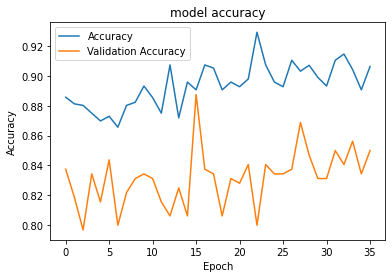

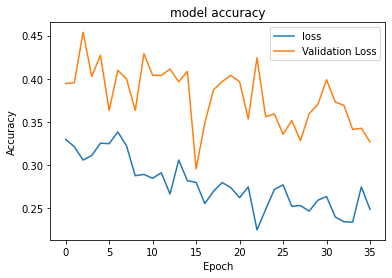

In [66]:
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy"])
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["loss","Validation Loss"])
plt.show()

Without Mask


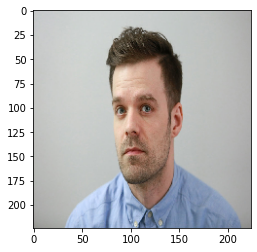

In [67]:
img = image.load_img("/content/face_mask_detection/without_mask_2.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
saved_model = load_model("vgg16_1.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("With Mask")
else:
    print('Without Mask')

# Testing

In [70]:
import cv2
import os
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np
from google.colab.patches import cv2_imshow

faceCascade = cv2.CascadeClassifier("haarcascade_frontalface_alt.xml")
model = load_model("/content/face_mask_detection/vgg16_1.h5")

def face_mask_detector(frame):
  # frame = cv2.imread(fileName)
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  faces = faceCascade.detectMultiScale(gray,
                                        scaleFactor=1.1,
                                        minNeighbors=5,
                                        minSize=(60, 60),
                                        flags=cv2.CASCADE_SCALE_IMAGE)
  faces_list=[]
  preds=[]
  for (x, y, w, h) in faces:
      face_frame = frame[y:y+h,x:x+w]
      face_frame = cv2.cvtColor(face_frame, cv2.COLOR_BGR2RGB)
      face_frame = cv2.resize(face_frame, (224, 224))
      face_frame = img_to_array(face_frame)
      face_frame = np.expand_dims(face_frame, axis=0)
      face_frame =  preprocess_input(face_frame)
      faces_list.append(face_frame)
      if len(faces_list)>0:
          preds = model.predict(faces_list)
      for pred in preds:
          (mask, withoutMask) = pred
      label = "Mask" if mask > withoutMask else "No Mask"
      color = (0, 255, 0) if label == "Mask" else (0, 0, 255)
      label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)
      cv2.putText(frame, label, (x, y- 10),
                  cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

      cv2.rectangle(frame, (x, y), (x + w, y + h),color, 3)
  # cv2_imshow(frame)
  return frame

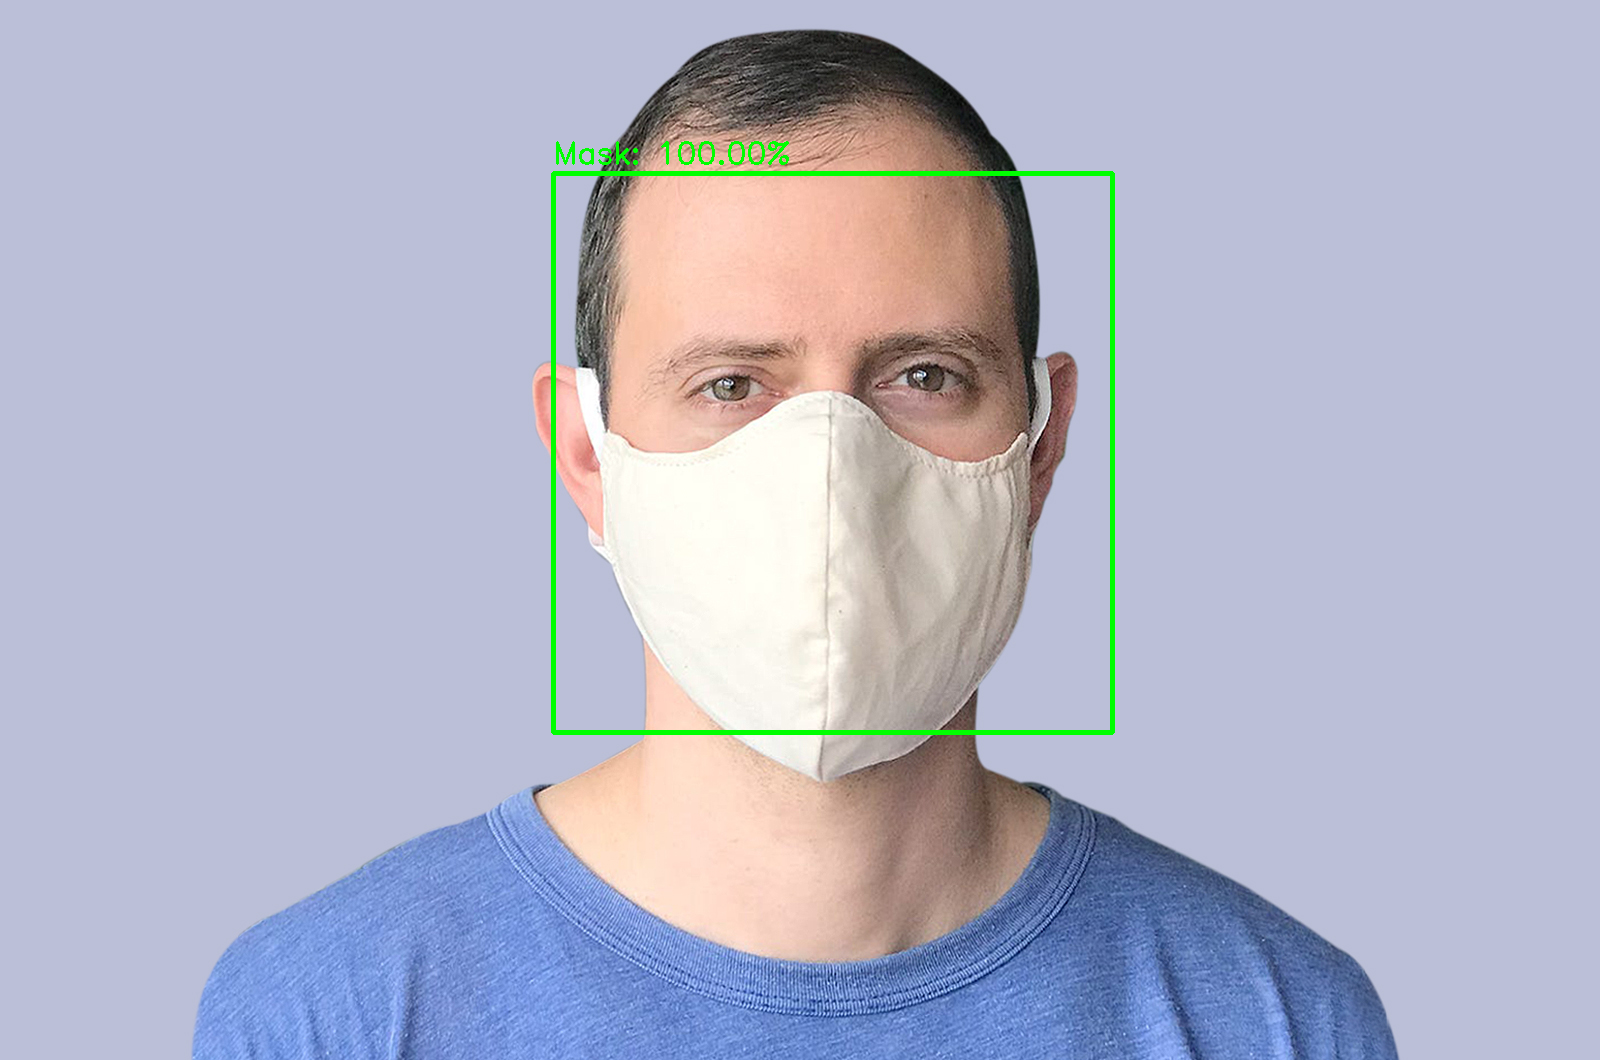

In [71]:
input_image = cv2.imread("/content/face_mask_detection/with_mask_1.jpg")
output = face_mask_detector(input_image)
cv2_imshow(output)

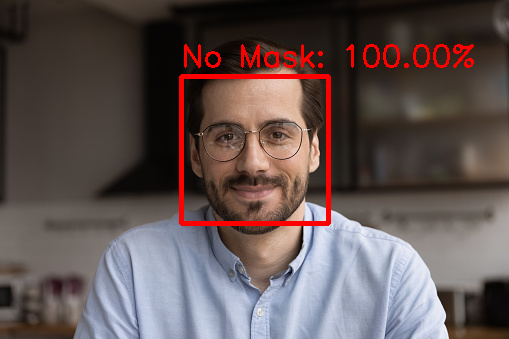

In [72]:
input_image = cv2.imread("/content/face_mask_detection/without_mask_1.jpg")
output = face_mask_detector(input_image)
cv2_imshow(output)

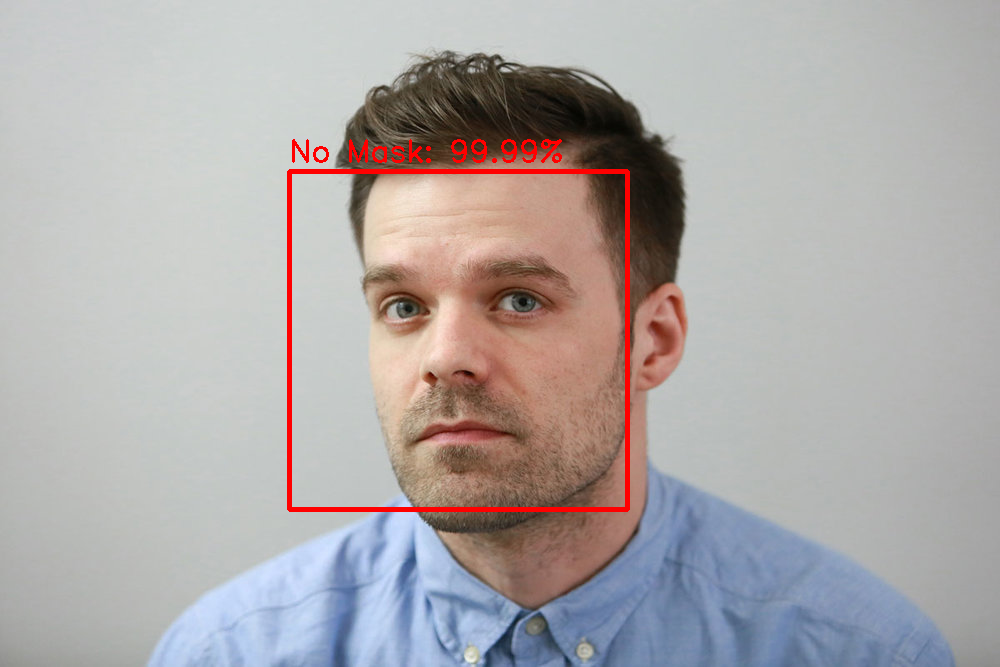

In [58]:
input_image = cv2.imread("/content/face_mask_detection/without_mask_2.jpg")
output = face_mask_detector(input_image)
cv2_imshow(output)

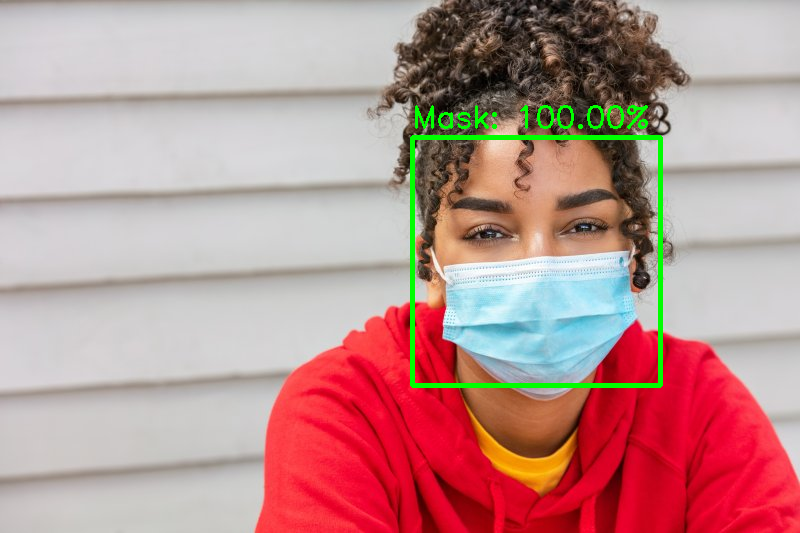

In [59]:
input_image = cv2.imread("/content/face_mask_detection/with_mask_2.jpg")
output = face_mask_detector(input_image)
cv2_imshow(output)